In [1]:
# Beat tracking example
from __future__ import print_function
import librosa
import librosa.display

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt


In [14]:
import pandas as pd

In [3]:
import IPython.display as ipd

In [4]:
import sklearn

In [15]:
train_noisy = pd.read_csv('../data/raw/train_noisy.csv')

In [17]:
train_noisy.tail()

,fname,labels
19810,fffc7128.wav,Accordion
19811,fffcf57b.wav,Acoustic_guitar
19812,fffd1871.wav,"Water_tap_and_faucet,Sink_(filling_or_washing)"
19813,fffe9808.wav,Clapping
19814,ffff6da3.wav,Walk_and_footsteps


In [40]:
train_noisy_aggr = train_noisy.groupby('labels').size().reset_index()
train_noisy_aggr.columns = ['labels', 'numreg']


In [41]:
train_noisy_aggr.sort_values('numreg', ascending=False, inplace=True)

In [42]:
train_noisy_aggr.to_csv('../data/processed/train_noisy_aggr.csv', index=False, sep=';')

In [105]:
train_noisy[train_noisy.labels == 'Cheering']

,fname,labels
185,021e8591.wav,Cheering
199,024ad294.wav,Cheering
234,02d79502.wav,Cheering
300,03a35bd8.wav,Cheering
435,058d472b.wav,Cheering
465,05e16209.wav,Cheering
564,077f6568.wav,Cheering
602,0807b6ac.wav,Cheering
605,081106df.wav,Cheering
664,08b34049.wav,Cheering


In [106]:
filename = '../data/raw/train_noisy/15886f37.wav'

In [107]:
# 2. Load the audio as a waveform `y`
#    Store the sampling rate as `sr`
y, sr = librosa.load(filename)

In [109]:
ipd.Audio(filename) # load a local WAV file

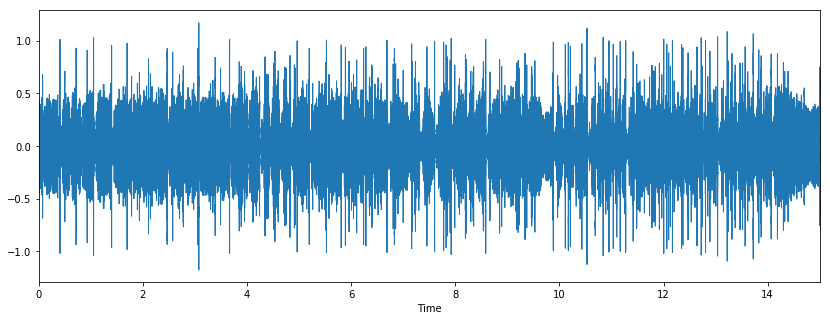

In [113]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(y, sr=sr)

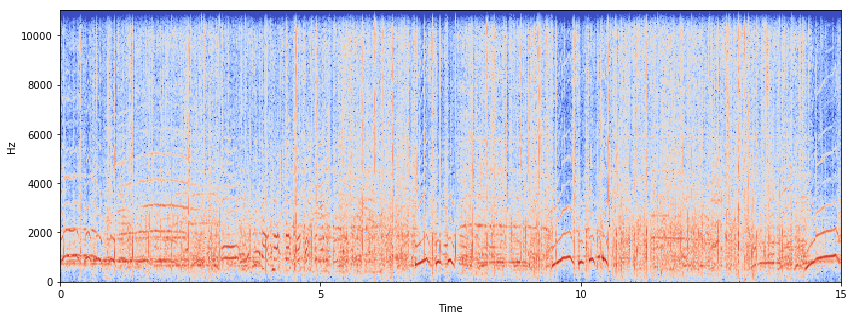

In [114]:
Y = librosa.stft(y,  n_fft=512, win_length=512,hop_length=512)
Ydb = librosa.amplitude_to_db(abs(Y))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Ydb, sr=sr, x_axis='time', y_axis='hz')

#### MEL

In [115]:
# Set the hop length; at 22050 Hz, 512 samples ~= 23ms
# also N of FFT is defined with this value
hop_length = 512
n_mels = 128

In [119]:
mels = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=n_mels*20, hop_length=hop_length, n_mels=n_mels, fmax=sr//2)

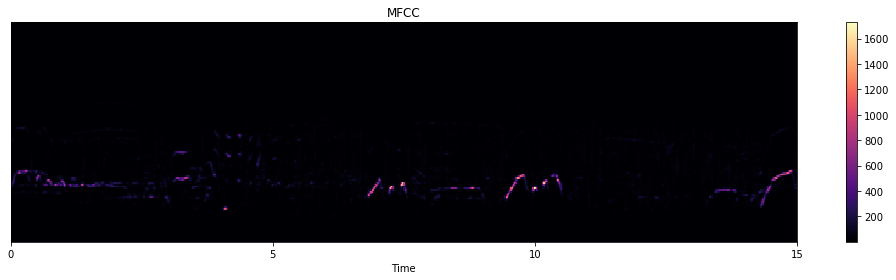

In [121]:
plt.figure(figsize=(14, 4))
librosa.display.specshow(mels, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()

#### MFCC

In [103]:
# Compute MFCC features from the raw signal
mfcc = librosa.feature.mfcc(y=y, sr=sr, hop_length=hop_length, dct_type=2, n_mfcc=40)

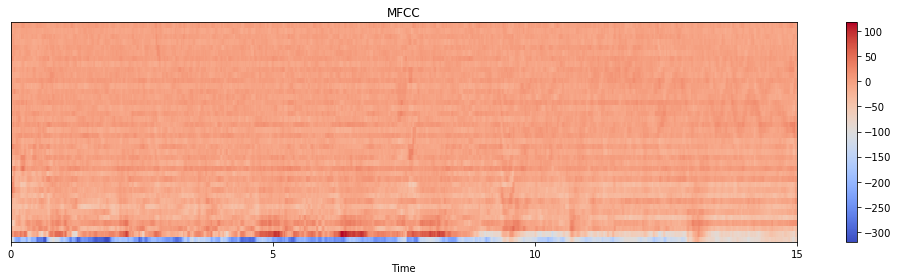

In [104]:
plt.figure(figsize=(14, 4))
librosa.display.specshow(mfcc, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()